<a href="https://colab.research.google.com/github/vg-rlo/TIL/blob/master/Programmers_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 설명
이 문제는 실제 Programmers 채용 공고 페이지를 방문한 개발자들의 방문/지원 기록을 바탕으로 추천모델을 만들어보는 것이다. 참고로 모든 데이터는 익명화되었음을 밝힌다. 구체적으로 개발자(userID로 표현됨)와 채용공고(jobID로 표현됨)를 보고 개발자가 해당 채용공고에 지원할지 안 할지를 예측하는 Binary Classifier를 만드는 것이다. 이 모델을 만드는데 필요한 feature들은 부가적으로 제공되는 데이터 파일들을 바탕으로 만들어내면 되며 이에 대해서는 뒤의 데이터 세트 섹션에서 설명한다.

* Colab에서 한글 폰트 사용하기 
  - [링크1](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb)
  - [링크2](https://teddylee777.github.io/colab/colab-korean)


In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
# 버전 체크
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
# 설치 글꼴 개수 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 설치된 나눔 글꼴 없음

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/lib

In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

# 마이너스 표시 안깨지도록 해준다. 
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
!pwd # 현재 디렉토리 위치 확인

/content


In [ ]:
%cd /content/drive/MyDrive/code # change directory 현 위치 변경 

/content/drive/MyDrive/code


In [ ]:
!ls # 현재 경로의 파일 리스트 확인

data  font


In [ ]:
import os 

os.getcwd() # 현재 경로 

'/content/drive/MyDrive/code'

In [ ]:
# Data load 
import pandas as pd

job_comp = pd.read_csv(os.getcwd() + '/data/job_companies.csv')
job_tags = pd.read_csv(os.getcwd() + '/data/job_tags.csv')
tags = pd.read_csv(os.getcwd() + '/data/tags.csv')
user_tags = pd.read_csv(os.getcwd() + '/data/user_tags.csv')
train = pd.read_csv(os.getcwd() + '/data/train.csv')
test_job = pd.read_csv(os.getcwd() + '/data/test_job.csv')
output_job = pd.read_csv(os.getcwd() + '/data/sample_output_job.csv')

In [ ]:
print(job_comp.head())
print(job_comp.describe())

                          companyID  ... companySize
0  00411460f7c92d2124a67ea0f4cb5f85  ...         NaN
1  1905aedab9bf2477edc068a355bba31a  ...       11-50
2  89fcd07f20b6785b92134bd6c1d0fa42  ...     101-200
3  acf4b89d3d503d8252c9c4ba75ddbf6d  ...        1-10
4  fb7b9ffa5462084c5f4e7e85a093e6d7  ...         NaN

[5 rows x 3 columns]
                               companyID  ... companySize
count                                733  ...         643
unique                               276  ...           7
top     b5dc4e5d9b495d0196f61d45b26ef33e  ...       11-50
freq                                  18  ...         260

[4 rows x 3 columns]


In [ ]:
print(job_tags.head())
print(job_tags.describe())

                              jobID                             tagID
0  320722549d1751cf3f247855f937b982  d38901788c533e8286cb6400b40b386d
1  e744f91c29ec99f0e662c9177946c627  3948ead63a9f2944218de038d8934305
2  e744f91c29ec99f0e662c9177946c627  0e095e054ee94774d6a496099eb1cf6a
3  e820a45f1dfc7b95282d10b6087e11c0  7d771e0e8f3633ab54856925ecdefc5d
4  e820a45f1dfc7b95282d10b6087e11c0  6c8dba7d0df1c4a79dd07646be9a26c8
                                   jobID                             tagID
count                               3477                              3477
unique                               733                               240
top     e17184bcb70dcf3942c54e0b537ffc6d  0e095e054ee94774d6a496099eb1cf6a
freq                                  17                               219


In [ ]:
print(tags.head())
print(tags.describe())

                              tagID                   keyword
0  602d1305678a8d5fdb372271e980da6a  Amazon Web Services(AWS)
1  e3251075554389fe91d17a794861d47b                Tensorflow
2  a1d50185e7426cbb0acad1e6ca74b9aa                    Docker
3  884d79963bd8bc0ae9b13a1aa71add73                       Git
4  4122cb13c7a474c1976c9706ae36521d                    Python
                                   tagID    keyword
count                                887        887
unique                               887        887
top     28f0b864598a1291557bed248a998d4e  Upbit API
freq                                   1          1


In [ ]:
print(user_tags.head())
print(user_tags.describe())

                             userID                             tagID
0  e576423831e043f7928d9ac113abbe6f  82c2559140b95ccda9c6ca4a8b981f1e
1  e576423831e043f7928d9ac113abbe6f  2ba8698b79439589fdd2b0f7218d8b07
2  e576423831e043f7928d9ac113abbe6f  351b33587c5fdd93bd42ef7ac9995a28
3  e576423831e043f7928d9ac113abbe6f  81e5f81db77c596492e6f1a5a792ed53
4  e576423831e043f7928d9ac113abbe6f  0e095e054ee94774d6a496099eb1cf6a
                                  userID                             tagID
count                              17194                             17194
unique                               196                               345
top     f69054686ba46877b6397ccdb8f51762  f47330643ae134ca204bf6b2481fec47
freq                                 572                               820


In [ ]:
print(train.head())
print(train.describe())

                             userID                             jobID  applied
0  fe292163d06253b716e9a0099b42031d  15de21c670ae7c3f6f3f1f37029303c9        0
1  6377fa90618fae77571e8dc90d98d409  55b37c5c270e5d84c793e486d798c01d        0
2  8ec0888a5b04139be0dfe942c7eb4199  0fcbc61acd0479dc77e3cccc0f5ffca7        1
3  f862b39f767d3a1991bdeb2ea1401c9c  3b5dca501ee1e6d8cd7b905f4e1bf723        0
4  cac14930c65d72c16efac2c51a6b7f71  287e03db1d99e0ec2edb90d079e142f3        0
           applied
count  6000.000000
mean      0.142833
std       0.349932
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [ ]:
print(test_job.head())
print(test_job.describe())

                             userID                             jobID
0  ebaee1af0c501f22ddfe242fc16dae53  352407221afb776e3143e8a1a0577885
1  9ab05403ac7808cbfba3da26665f7a9c  96b9bff013acedfb1d140579e2fbeb63
2  33349e909eba71677299d2fc97e158b7  58d4d1e7b1e97b258c9ed0b37e02d087
3  ac985a9db5faeb44c94a334430ccc241  ccb0989662211f61edae2e26d58ea92f
4  d41e0e6f6f1e29098d9d152511503ab2  4a213d37242bdcad8e7300e202e7caa4
                                  userID                             jobID
count                               2435                              2435
unique                               196                               591
top     b052e2e0c0ad1b2d5036bd56e27d061c  da0d1111d2dc5d489242e60ebcbaf988
freq                                  49                                24


In [ ]:
print(output_job.head())
print(output_job.describe())

   applied
0        0
1        1
2        0
3        1
4        0
        applied
count  8.000000
mean   0.500000
std    0.534522
min    0.000000
25%    0.000000
50%    0.500000
75%    1.000000
max    1.000000


In [ ]:
# 데이터의 피쳐 확인
print(job_comp.columns)
print(job_tags.columns)
print(tags.columns)
print(user_tags.columns)
print(train.columns) # 맞춰야하는 label='applied'
print(test_job.columns) # 주어지는 columns='userID', 'jobID'
print(output_job.columns)

Index(['companyID', 'jobID', 'companySize'], dtype='object')
Index(['jobID', 'tagID'], dtype='object')
Index(['tagID', 'keyword'], dtype='object')
Index(['userID', 'tagID'], dtype='object')
Index(['userID', 'jobID', 'applied'], dtype='object')
Index(['userID', 'jobID'], dtype='object')
Index(['applied'], dtype='object')


In [ ]:
# tags의 지표 확인 
print(tags.value_counts()) # 각 요소별 개수 
print('unique한 tagID 개수: ', tags['tagID'].nunique()) # 유일한 개수

tagID                             keyword        
ffeed84c7cb1ae7bf4ec4bd78275bb98  Bootstrap          1
53c04118df112c13a8c34b38343b9c10  AutoCAD            1
5680522b8e2bb01943234bce7bf84534  Jenkins            1
56468d5607a5aaf1604ff5e15593b003  AWS ElastiCache    1
5607fe8879e4fd269e88387e8cb30b7e  Handlebars.js      1
                                                    ..
a89cf525e1d9f04d16ce31165e139a4b  AWS Alexa          1
a86c450b76fb8c371afead6410d55534  recommendation     1
a7d8ae4569120b5bec12e7b6e9648b86  Heroku             1
a7a3d70c6d17a73140918996d03c014f  Upbit API          1
0004d0b59e19461ff126e3a08a814c33  AWS CodeCommit     1
Length: 887, dtype: int64
unique한 tagID 개수:  887


=> tags는 해당 tagID가 해당하는 keyword를 저장하고 있는 데이터셋이므로, 단어사전과 같다. 

In [ ]:
# null값 확인 
train.isnull().sum()

userID     0
jobID      0
applied    0
dtype: int64

In [ ]:
# 중복 제거 처리
print("중복 제거 전: ", train.shape)

train = train.drop_duplicates()
print("중복 제거 후: ", train.shape)

중복 제거 전:  (6000, 3)
중복 제거 후:  (6000, 3)


label 0 개수:  5143
label 1 개수:  857


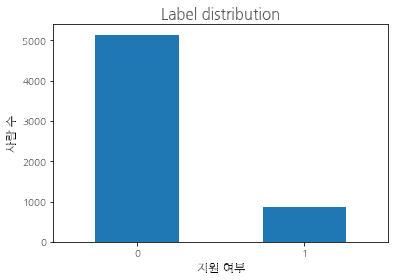

In [ ]:
# 데이터셋의 라벨 분포 확인 
import matplotlib.pyplot as plt

print('label 0 개수: ', train[train['applied']==0]['applied'].count())
print('label 1 개수: ', train[train['applied']==1]['applied'].count())

train['applied'].value_counts().plot(kind='bar')
plt.title("Label distribution", fontsize=15)
plt.ylabel("사람 수", fontsize=12)
plt.xlabel("지원 여부", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
print(train.columns)
print(tags.columns)
print(job_tags.columns)
print(user_tags.columns)

Index(['userID', 'jobID', 'applied'], dtype='object')
Index(['tagID', 'keyword'], dtype='object')
Index(['jobID', 'tagID'], dtype='object')
Index(['userID', 'tagID'], dtype='object')


In [ ]:
print(train.count())
print(tags.count())
print(job_tags.count())
print(user_tags.count())

userID     6000
jobID      6000
applied    6000
dtype: int64
tagID      887
keyword    887
dtype: int64
jobID    3477
tagID    3477
dtype: int64
userID    17194
tagID     17194
dtype: int64


In [ ]:
job_tags = pd.merge(job_tags, tags)
print(len(job_tags))
print(job_tags.head())

3477
                              jobID                             tagID keyword
0  320722549d1751cf3f247855f937b982  d38901788c533e8286cb6400b40b386d    Ruby
1  851ddf5058cf22df63d3344ad89919cf  d38901788c533e8286cb6400b40b386d    Ruby
2  c4ca4238a0b923820dcc509a6f75849b  d38901788c533e8286cb6400b40b386d    Ruby
3  3a15c7d0bbe60300a39f76f8a5ba6896  d38901788c533e8286cb6400b40b386d    Ruby
4  577bcc914f9e55d5e4e4f82f9f00e7d4  d38901788c533e8286cb6400b40b386d    Ruby


In [ ]:
user_tags = pd.merge(user_tags, tags)
print(len(user_tags))
print(user_tags.head())

17194
                             userID                             tagID keyword
0  e576423831e043f7928d9ac113abbe6f  82c2559140b95ccda9c6ca4a8b981f1e   JUnit
1  078dd365ebc98784af7f8df76a98f53a  82c2559140b95ccda9c6ca4a8b981f1e   JUnit
2  e57c6b956a6521b28495f2886ca0977a  82c2559140b95ccda9c6ca4a8b981f1e   JUnit
3  078dd365ebc98784af7f8df76a98f53a  82c2559140b95ccda9c6ca4a8b981f1e   JUnit
4  078dd365ebc98784af7f8df76a98f53a  82c2559140b95ccda9c6ca4a8b981f1e   JUnit


In [ ]:
# 종속 변수 컬럼 확인
df_X = train[['userID', 'jobID']]
df_X.head()

,userID,jobID
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3


In [ ]:
# 독립 변수 컬럼 확인
df_y = train['applied']
df_y.head()

0    0
1    0
2    1
3    0
4    0
Name: applied, dtype: int64

In [ ]:
# random seed 고정
SEED = 42

In [ ]:
# 데이터셋 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=SEED)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4200, 2)
(4200,)
(1800, 2)
(1800,)


In [ ]:
X_train

,userID,jobID
4775,fdfa9a38cf3d8d850a6fd47b438bfe43,2bcab9d935d219641434683dd9d18a03
927,0c3b7a46ba662029936002edd5613a45,192fc044e74dffea144f9ac5dc9f3395
3258,6eb6e75fddec0218351dc5c0c8464104,f74909ace68e51891440e4da0b65a70c
45,f0860e86a075967417cd511aa80f0e4d,c8ed21db4f678f3b13b9d5ee16489088
1260,838c13b8aa97e2d988ef4495460f2e0e,303ed4c69846ab36c2904d3ba8573050
...,...,...
3772,7e5c43aee3b770da0c9be62c298971cc,c8ba76c279269b1c6bc8a07e38e78fa4
5191,bd652bf1e9b66171ef77f1e0db2e9c1e,81448138f5f163ccdba4acc69819f280
5226,2b3c53530d9f5948021ce2d30ca78def,6d70cb65d15211726dcce4c0e971e21c
5390,6bd22a86b1f7a3a11de928d301f86d67,854d9fca60b4bd07f9bb215d59ef5561
